# Angle of Repose predictor
Author: Adam Kolusz


## Goal Understanding

- Forecast angle of repose for a set number of DEM parameters,
- Small dataset - currently 49 simulations,
- Replace computation heavy initial simulations, not completely replace the process,
- Define approach to the problem to use it in future for another experiment - simulation coupling.

##  Data Understanding


In [456]:
import pandas as pd
df = pd.read_excel("data\sensitivity_analisys_results_v2.xlsx", usecols="B:H")
df.head()

,friction_coeff,adhesive_distance,force_fraction,restitution_coeff,rolling_resistance,tangential_stiffness,Angle of Repose
0,0.2,0.0011,0.16,0.34,0.32,0.52,33.84
1,0.2,0.0011,0.16,0.34,0.32,1.00,34.45
2,0.8,0.0005,0.16,0.22,0.20,0.20,35.88
3,0.2,0.0005,0.40,0.16,0.68,0.68,36.42
4,0.2,0.0009,0.28,0.28,0.68,0.36,37.40


In [457]:
df.tail()

,friction_coeff,adhesive_distance,force_fraction,restitution_coeff,rolling_resistance,tangential_stiffness,Angle of Repose
44,0.68,0.0011,0.22,0.40,0.56,0.68,59.65
45,0.80,0.0005,0.40,0.40,0.68,1.00,61.26
46,0.56,0.0011,0.40,0.16,0.68,0.20,61.70
47,0.56,0.0011,0.40,0.16,0.68,0.68,63.71
48,0.56,0.0011,0.34,0.16,0.68,0.52,64.06


In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   friction_coeff        49 non-null     float64
 1   adhesive_distance     49 non-null     float64
 2   force_fraction        49 non-null     float64
 3   restitution_coeff     49 non-null     float64
 4   rolling_resistance    49 non-null     float64
 5   tangential_stiffness  49 non-null     float64
 6   Angle of Repose       49 non-null     float64
dtypes: float64(7)
memory usage: 2.8 KB


In [459]:
for col in df.columns:
    print(col, len(df[col].unique()), df[col].unique())

friction_coeff 6 [0.2  0.8  0.44 0.56 0.32 0.68]
adhesive_distance 4 [0.0011 0.0005 0.0009 0.0015]
force_fraction 6 [0.16 0.4  0.28 0.22 0.1  0.34]
restitution_coeff 6 [0.34 0.22 0.16 0.28 0.1  0.4 ]
rolling_resistance 6 [0.32 0.2  0.68 0.56 0.44 0.8 ]
tangential_stiffness 6 [0.52 1.   0.2  0.68 0.36 0.84]
Angle of Repose 46 [33.84 34.45 35.88 36.42 37.4  37.87 38.47 38.69 39.97 40.73 41.63 41.86
 42.43 42.55 42.99 43.69 44.26 45.72 46.94 47.   47.2  47.54 47.95 48.32
 48.56 48.68 49.37 49.69 49.86 50.49 51.93 52.16 52.42 52.7  53.48 53.65
 54.97 55.15 57.67 58.06 59.11 59.65 61.26 61.7  63.71 64.06]


In [460]:
df.describe()

,friction_coeff,adhesive_distance,force_fraction,restitution_coeff,rolling_resistance,tangential_stiffness,Angle of Repose
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,0.484082,0.000933,0.303265,0.261633,0.515918,0.591837,47.543469
std,0.217293,0.000347,0.100112,0.091818,0.186055,0.263436,8.147996
min,0.200000,0.000500,0.100000,0.100000,0.200000,0.200000,33.840000
25%,0.200000,0.000500,0.220000,0.160000,0.320000,0.360000,41.630000
50%,0.560000,0.001100,0.340000,0.220000,0.560000,0.680000,47.540000
75%,0.560000,0.001100,0.400000,0.340000,0.680000,0.840000,52.700000
max,0.800000,0.001500,0.400000,0.400000,0.800000,1.000000,64.060000


In [461]:
df.dtypes

friction_coeff          float64
adhesive_distance       float64
force_fraction          float64
restitution_coeff       float64
rolling_resistance      float64
tangential_stiffness    float64
Angle of Repose         float64
dtype: object

In [462]:
from matplotlib import pyplot as plt
import seaborn as sns

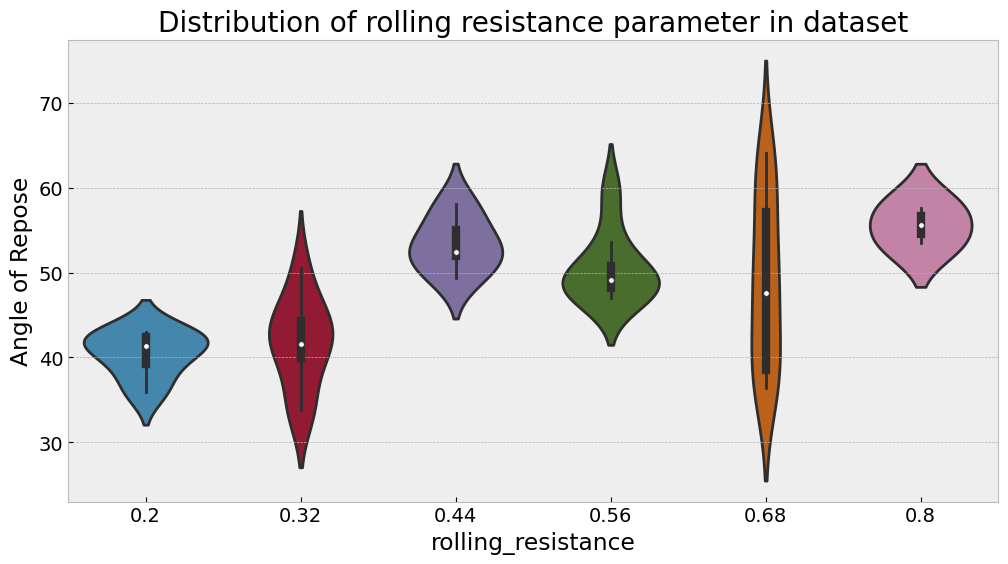

In [463]:
plt.figure(figsize=(12,6))
plt.style.use('bmh')
sns.violinplot(x='rolling_resistance', 
               y='Angle of Repose', 
               data=df
               ).set_title('Distribution of rolling resistance parameter in dataset')
plt.show()

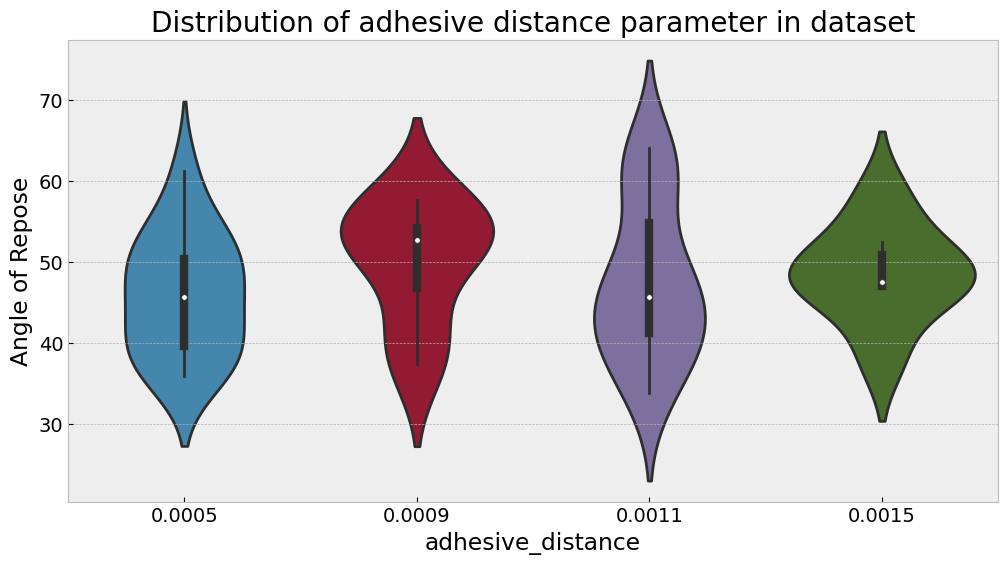

In [464]:
plt.figure(figsize=(12,6))
plt.style.use('bmh')
sns.violinplot(x='adhesive_distance', 
               y='Angle of Repose', 
               data=df
               ).set_title('Distribution of adhesive distance parameter in dataset')
plt.show()

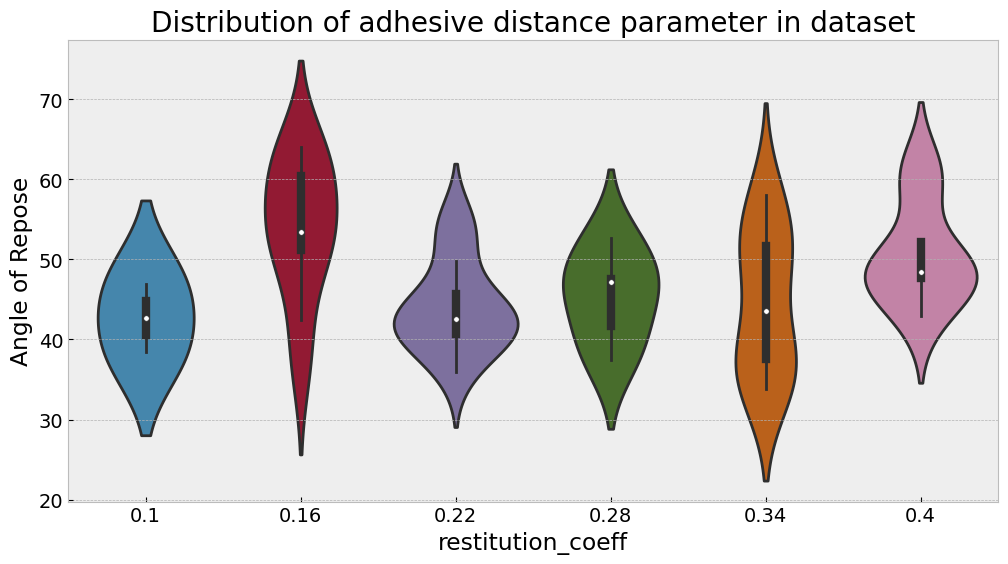

In [465]:
plt.figure(figsize=(12,6))
plt.style.use('bmh')
sns.violinplot(x='restitution_coeff', 
               y='Angle of Repose', 
               data=df
               ).set_title('Distribution of adhesive distance parameter in dataset')
plt.show()

In [466]:
df.head()

,friction_coeff,adhesive_distance,force_fraction,restitution_coeff,rolling_resistance,tangential_stiffness,Angle of Repose
0,0.2,0.0011,0.16,0.34,0.32,0.52,33.84
1,0.2,0.0011,0.16,0.34,0.32,1.00,34.45
2,0.8,0.0005,0.16,0.22,0.20,0.20,35.88
3,0.2,0.0005,0.40,0.16,0.68,0.68,36.42
4,0.2,0.0009,0.28,0.28,0.68,0.36,37.40


## Correlation

In [467]:
df.corr()

,friction_coeff,adhesive_distance,force_fraction,restitution_coeff,rolling_resistance,tangential_stiffness,Angle of Repose
friction_coeff,1.000000,-0.390563,0.013931,0.003836,-0.136447,-0.133338,0.465189
adhesive_distance,-0.390563,1.000000,-0.051074,-0.059208,-0.000474,-0.026177,0.110556
force_fraction,0.013931,-0.051074,1.000000,0.047456,0.056207,0.117312,0.386953
restitution_coeff,0.003836,-0.059208,0.047456,1.000000,-0.101066,-0.035268,-0.077974
rolling_resistance,-0.136447,-0.000474,0.056207,-0.101066,1.000000,0.123081,0.429662
tangential_stiffness,-0.133338,-0.026177,0.117312,-0.035268,0.123081,1.000000,0.013050
Angle of Repose,0.465189,0.110556,0.386953,-0.077974,0.429662,0.013050,1.000000


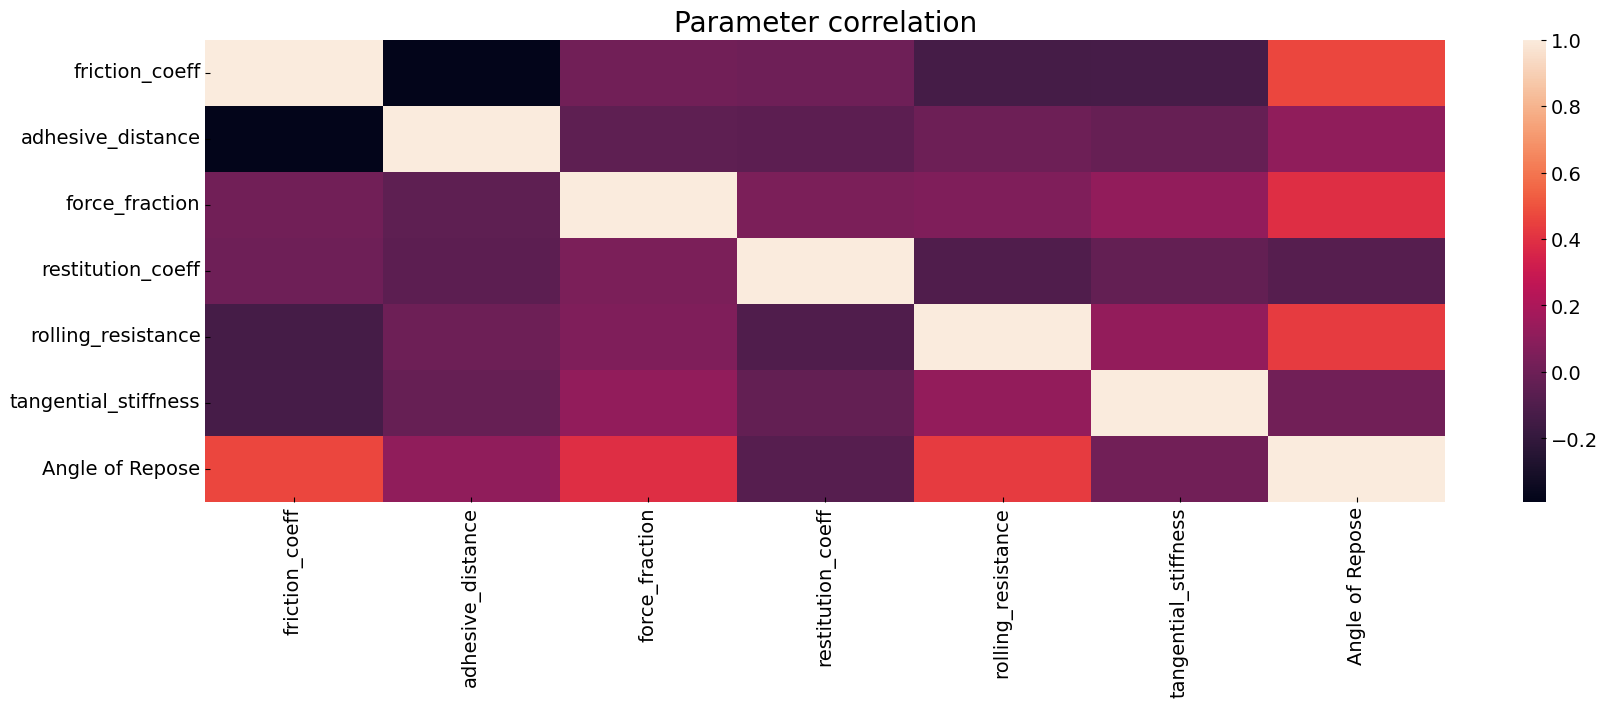

In [468]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr()).set_title('Parameter correlation')
plt.show()

## Data Preparation

In [469]:
import numpy as np

In [470]:
df.dtypes

friction_coeff          float64
adhesive_distance       float64
force_fraction          float64
restitution_coeff       float64
rolling_resistance      float64
tangential_stiffness    float64
Angle of Repose         float64
dtype: object

In [471]:
pd.get_dummies(df)

,friction_coeff,adhesive_distance,force_fraction,restitution_coeff,rolling_resistance,tangential_stiffness,Angle of Repose
0,0.20,0.0011,0.16,0.34,0.32,0.52,33.84
1,0.20,0.0011,0.16,0.34,0.32,1.00,34.45
2,0.80,0.0005,0.16,0.22,0.20,0.20,35.88
3,0.20,0.0005,0.40,0.16,0.68,0.68,36.42
4,0.20,0.0009,0.28,0.28,0.68,0.36,37.40
5,0.20,0.0005,0.22,0.34,0.68,0.68,37.40
6,0.20,0.0011,0.16,0.34,0.68,0.52,37.87
7,0.20,0.0005,0.40,0.34,0.68,0.68,38.47
8,0.20,0.0015,0.10,0.10,0.68,0.84,38.47
9,0.80,0.0011,0.16,0.22,0.20,0.20,38.69


In [472]:
X = df.drop(['Angle of Repose'], axis = 1)
y = df['Angle of Repose']

### Augumentation via interpolation

In order to augment data, first create a full 6D grid with a set stepsize between max and min value of data avaiable.\
Populate the AoR values on the basis of linearization, take into consideration only valid points within the convex hull of the data.
Such approach is to be accepted only as a preliminary analysis, due to the sensitivity analysis performed in Matlab results (with the use of Morris' method). 
It has been shown that most parameters do not behave in a very linear way. \
\
The graph shows correspondance of parameters to the output as well as their linearity. The higher $\delta$, the higher the nonlinear behaviour, larger $\mu$ shows better influence on the output. 
The 6 selected parameters have shown to have higher influence on output (the highest: *rolling resistance*) therefore enabling control of the value in the simulation with modifying smaller number of parameters, i.e. tweaking only using *rolling resistance* due to its high impact on output as well rather linear behaviour. Moreover, 2nd figure shows how the size of certain parameters influence computation time. By using small *adhesive distance* we can expect good performance boost and reduced computation time.

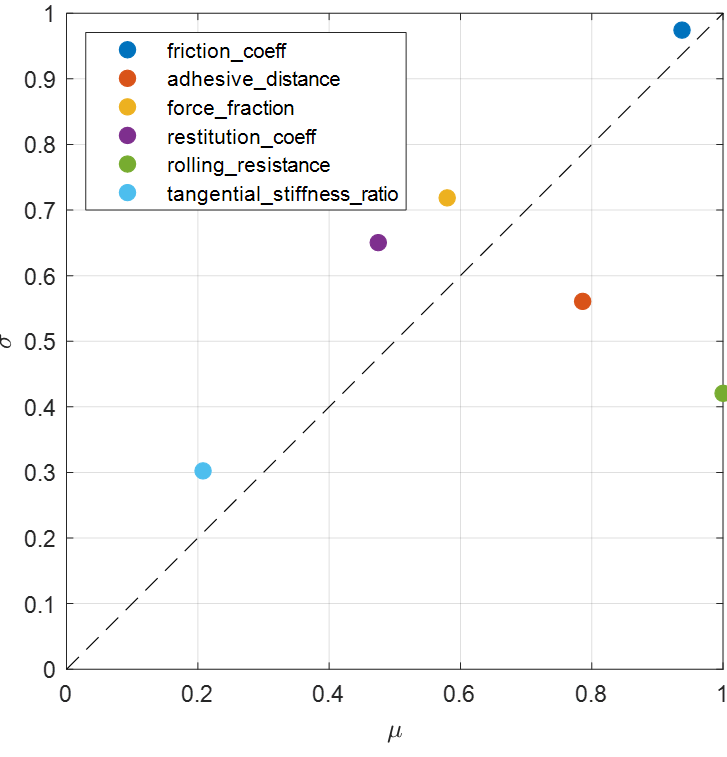

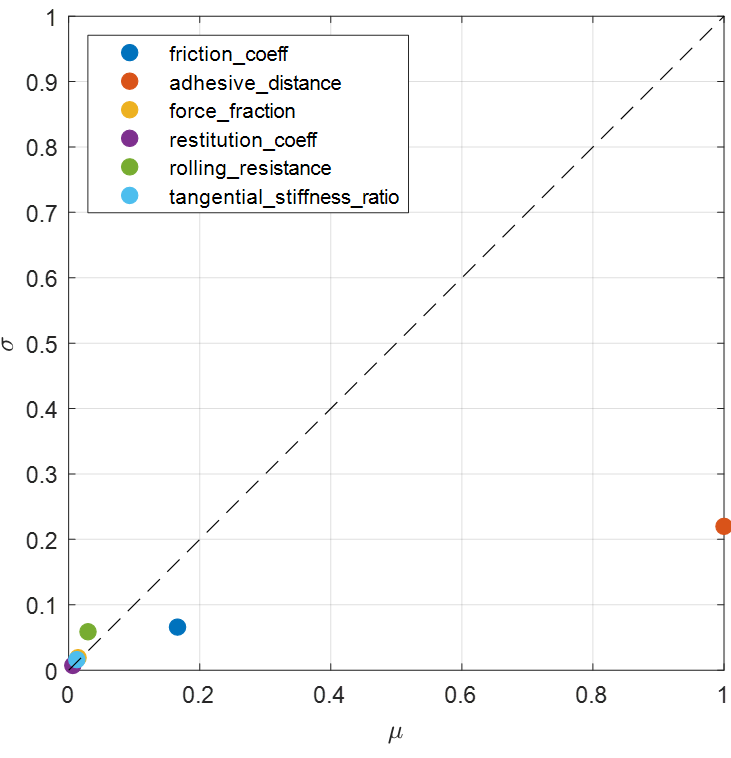

In [473]:
from IPython.display import display, Image
path_morris_aor = "./data/morris_plot_aor.png"
path_morris_time = "./data/morris_plot_time.png"
display(Image(filename=path_morris_aor),Image(filename=path_morris_time))

In [474]:
# xy = np.mgrid[points[:,0].min():points[:,0].max():step_size, points[:,1].min():points[:,1].max():step_size]

In [513]:
points = X.to_numpy()
values = y.to_numpy()
step_size = 8j
resizer = 1
resizer2 = 1
xy = np.mgrid[points[:,0].min()*resizer:points[:,0].max()*resizer2:step_size,
            points[:,1].min()*resizer:points[:,1].max()*resizer2:step_size,
            points[:,2].min()*resizer:points[:,2].max()*resizer2:step_size,
            points[:,3].min()*resizer:points[:,3].max()*resizer2:step_size,
            points[:,4].min()*resizer:points[:,4].max()*resizer2:step_size,
            points[:,5].min()*resizer:points[:,5].max()*resizer2:step_size].reshape(6,-1).T

print(np.shape(xy))
print(xy)

(262144, 6)
[[2.00000000e-01 5.00000000e-04 1.00000000e-01 1.00000000e-01
  2.00000000e-01 2.00000000e-01]
 [2.00000000e-01 5.00000000e-04 1.00000000e-01 1.00000000e-01
  2.00000000e-01 3.14285714e-01]
 [2.00000000e-01 5.00000000e-04 1.00000000e-01 1.00000000e-01
  2.00000000e-01 4.28571429e-01]
 ...
 [8.00000000e-01 1.50000000e-03 4.00000000e-01 4.00000000e-01
  8.00000000e-01 7.71428571e-01]
 [8.00000000e-01 1.50000000e-03 4.00000000e-01 4.00000000e-01
  8.00000000e-01 8.85714286e-01]
 [8.00000000e-01 1.50000000e-03 4.00000000e-01 4.00000000e-01
  8.00000000e-01 1.00000000e+00]]


In [516]:
from scipy.interpolate import LinearNDInterpolator
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

Z_dot = griddata(points, values, xy, 'nearest', 100, False)
Z_dot = Z_dot.reshape(1,-1).T
print(np.shape(xy), np.shape(Z_dot))
b = np.hstack((xy, Z_dot))
mask =  Z_dot > 100
valid_ind = np.where(b[:,6] < 99)
new_data = b[valid_ind]
aug_df = pd.DataFrame(new_data, columns=df.columns)
aug_df.head()

(262144, 6) (262144, 1)


,friction_coeff,adhesive_distance,force_fraction,restitution_coeff,rolling_resistance,tangential_stiffness,Angle of Repose
0,0.2,0.0005,0.1,0.1,0.2,0.200000,42.55
1,0.2,0.0005,0.1,0.1,0.2,0.314286,33.84
2,0.2,0.0005,0.1,0.1,0.2,0.428571,33.84
3,0.2,0.0005,0.1,0.1,0.2,0.542857,33.84
4,0.2,0.0005,0.1,0.1,0.2,0.657143,33.84


It can be noted that unique newly generated data lies within the 6D hull, therefore edges are not taken into consideration and are always within min and max of initial set.
This leads to the limits in input parameters, as if some of them are used outside initial ranges the results will have a big error.

In [517]:
aug_df['tangential_stiffness'].value_counts()

0.200000    32768
0.314286    32768
0.428571    32768
0.542857    32768
0.657143    32768
0.771429    32768
0.885714    32768
1.000000    32768
Name: tangential_stiffness, dtype: int64

In [518]:
for col in aug_df.columns:
    print(col, len(aug_df[col].unique()), aug_df[col].unique())

friction_coeff 8 [0.2        0.28571429 0.37142857 0.45714286 0.54285714 0.62857143
 0.71428571 0.8       ]
adhesive_distance 8 [0.0005     0.00064286 0.00078571 0.00092857 0.00107143 0.00121429
 0.00135714 0.0015    ]
force_fraction 8 [0.1        0.14285714 0.18571429 0.22857143 0.27142857 0.31428571
 0.35714286 0.4       ]
restitution_coeff 8 [0.1        0.14285714 0.18571429 0.22857143 0.27142857 0.31428571
 0.35714286 0.4       ]
rolling_resistance 8 [0.2        0.28571429 0.37142857 0.45714286 0.54285714 0.62857143
 0.71428571 0.8       ]
tangential_stiffness 8 [0.2        0.31428571 0.42857143 0.54285714 0.65714286 0.77142857
 0.88571429 1.        ]
Angle of Repose 46 [42.55 33.84 41.86 34.45 38.47 37.4  37.87 47.2  49.37 42.99 36.42 46.94
 48.56 43.69 39.97 42.43 45.72 47.54 41.63 48.32 61.7  59.11 53.48 50.49
 51.93 52.16 54.97 57.67 64.06 52.42 52.7  48.68 49.69 58.06 63.71 59.65
 35.88 40.73 49.86 61.26 47.95 38.69 47.   55.15 53.65 44.26]


In [484]:
print(valid_ind.shape)

AttributeError: 'tuple' object has no attribute 'shape'

In [519]:
print(np.sort(aug_df['rolling_resistance'].unique()))
print(np.sort(df['rolling_resistance'].unique()))

[0.2        0.28571429 0.37142857 0.45714286 0.54285714 0.62857143
 0.71428571 0.8       ]
[0.2  0.32 0.44 0.56 0.68 0.8 ]


In [290]:
# from matplotlib.colors import BoundaryNorm, ListedColormap
# grid_kws = {"height_ratios": (1, ), "hspace": .4}
# # fig, (g1, g2) = plt.subplots(1, 1, figsize=(16, 18), gridspec_kw=grid_kws)
# # plt.rcParams['font.size'] = '14'
# # fig = plt.figure(figsize=(16,18))
# g1 = sns.heatmap(aug_df.corr(), annot=True,vmin=-0.41,vmax=1).set_title('Augmented data correlation')
# # ax = fig.add_subplot(1,1,1)
# g1.rcParams['font.size'] = 14
# plt.show()

Compare the correlation of datasets with the original dataset and check distribution of points

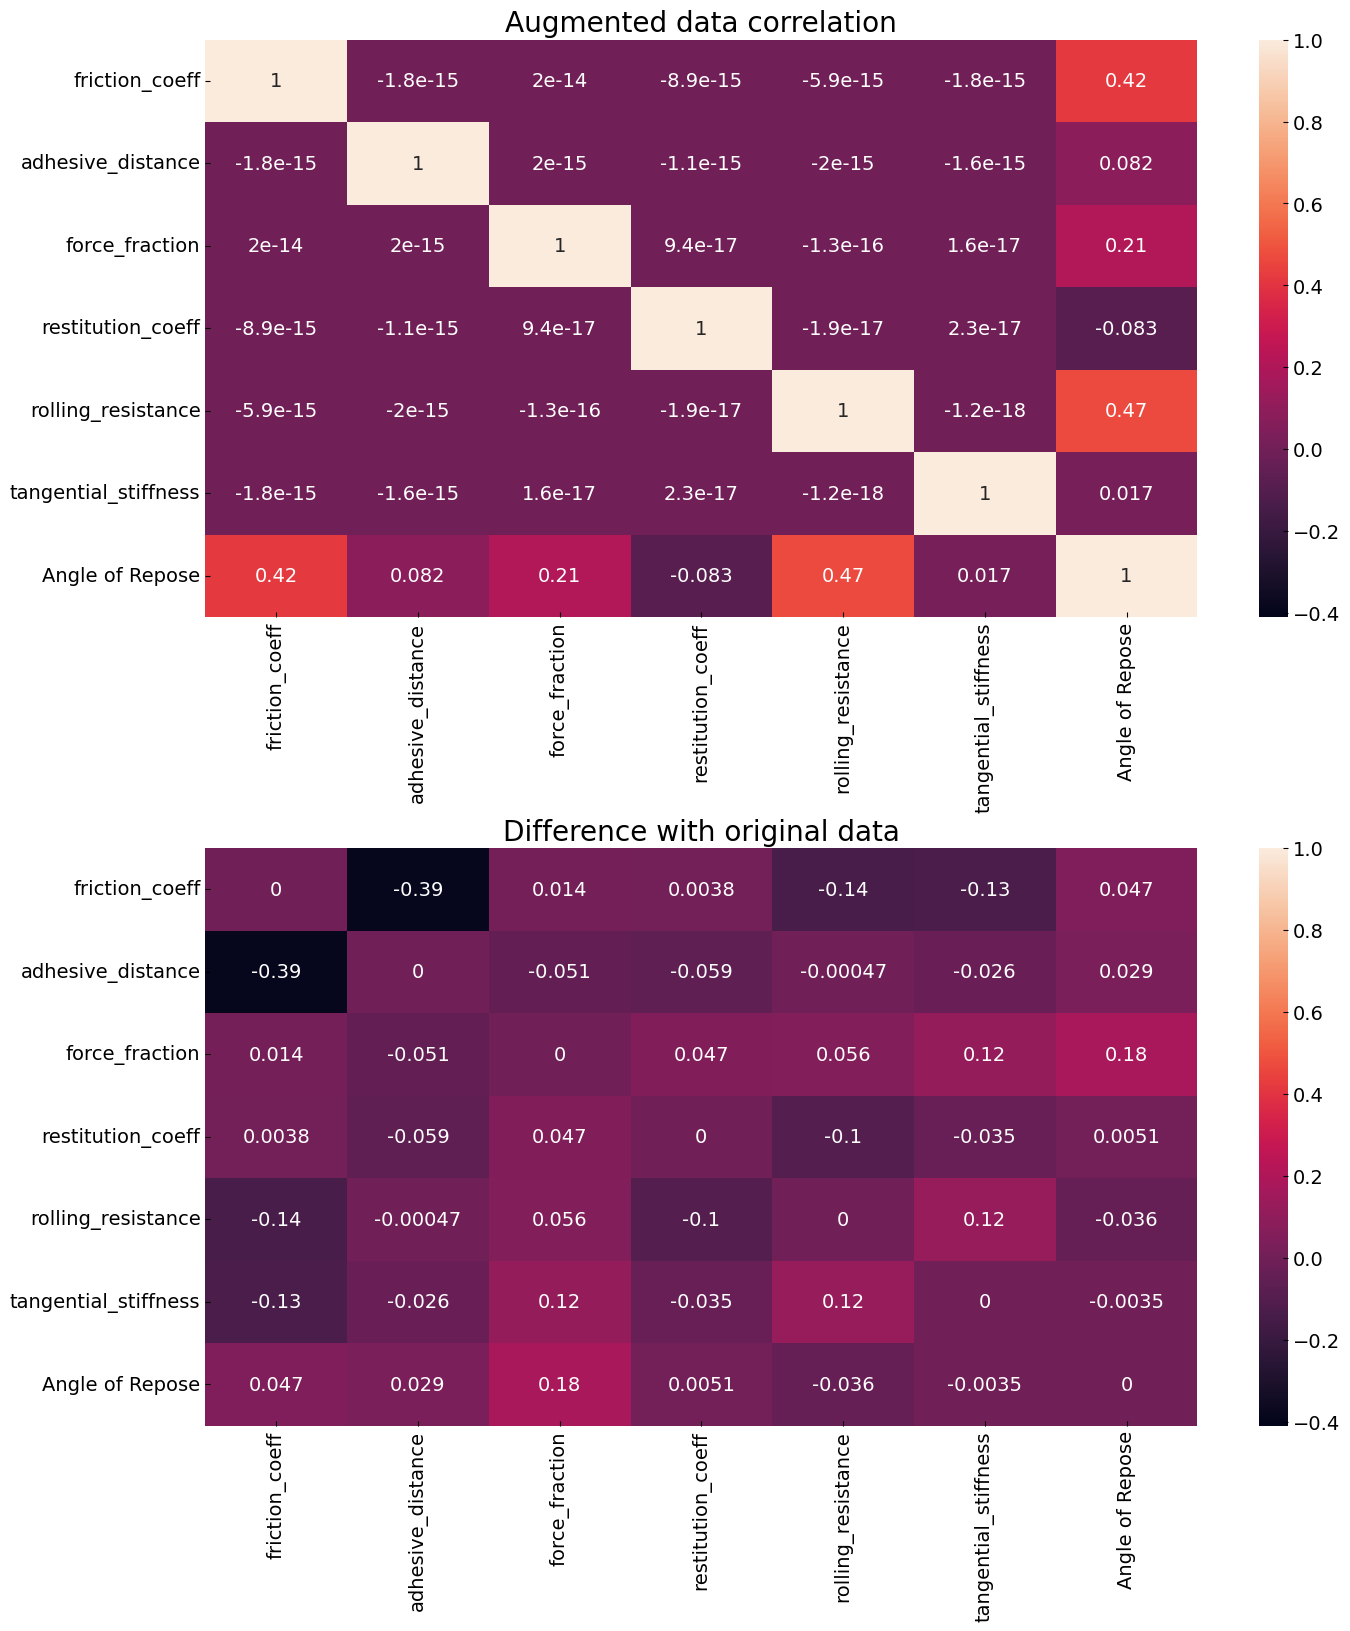

In [520]:
from matplotlib.colors import BoundaryNorm, ListedColormap
grid_kws = {"height_ratios": (1, 1), "hspace": .4}
fig, (g1, g2) = plt.subplots(2, 1, figsize=(16, 18), gridspec_kw=grid_kws)
# plt.rcParams['font.size'] = '14'

g1 = sns.heatmap(aug_df.corr(),ax=g1,annot=True,vmin=-0.41,vmax=1).set_title('Augmented data correlation')
g2 = sns.heatmap(df.corr()-aug_df.corr(),ax=g2,annot=True,vmin=-0.41,vmax=1).set_title('Difference with original data')

plt.show()

Small differences to original correlation matrix indicate valid augmentation.

In [521]:
for col in df.columns:
    print(col, len(aug_df[col].unique()), aug_df[col].unique())

friction_coeff 8 [0.2        0.28571429 0.37142857 0.45714286 0.54285714 0.62857143
 0.71428571 0.8       ]
adhesive_distance 8 [0.0005     0.00064286 0.00078571 0.00092857 0.00107143 0.00121429
 0.00135714 0.0015    ]
force_fraction 8 [0.1        0.14285714 0.18571429 0.22857143 0.27142857 0.31428571
 0.35714286 0.4       ]
restitution_coeff 8 [0.1        0.14285714 0.18571429 0.22857143 0.27142857 0.31428571
 0.35714286 0.4       ]
rolling_resistance 8 [0.2        0.28571429 0.37142857 0.45714286 0.54285714 0.62857143
 0.71428571 0.8       ]
tangential_stiffness 8 [0.2        0.31428571 0.42857143 0.54285714 0.65714286 0.77142857
 0.88571429 1.        ]
Angle of Repose 46 [42.55 33.84 41.86 34.45 38.47 37.4  37.87 47.2  49.37 42.99 36.42 46.94
 48.56 43.69 39.97 42.43 45.72 47.54 41.63 48.32 61.7  59.11 53.48 50.49
 51.93 52.16 54.97 57.67 64.06 52.42 52.7  48.68 49.69 58.06 63.71 59.65
 35.88 40.73 49.86 61.26 47.95 38.69 47.   55.15 53.65 44.26]


Merge original and augmented dataframes.

In [293]:
df['augmented'] = False
aug_df['augmented'] = True
new_df = pd.concat([df, aug_df], axis=0, ignore_index=True)
new_df = new_df.round(decimals=6)
new_df.tail()

,friction_coeff,adhesive_distance,force_fraction,restitution_coeff,rolling_resistance,tangential_stiffness,Angle of Repose,augmented
32099,0.8,0.000875,0.2125,0.25,0.35,0.6,45.775417,True
32100,0.8,0.000875,0.2500,0.25,0.35,0.5,44.973333,True
32101,0.8,0.000875,0.2500,0.25,0.35,0.6,45.398333,True
32102,0.8,0.000875,0.2500,0.25,0.35,0.7,45.823333,True
32103,0.8,0.000875,0.2500,0.25,0.35,0.8,46.248333,True


Check if there are any index duplicates which could occur during dataframe merging.

In [294]:
len(new_df[new_df.index.duplicated()])

0

In [295]:
pd.get_dummies(new_df[45:54])

,friction_coeff,adhesive_distance,force_fraction,restitution_coeff,rolling_resistance,tangential_stiffness,Angle of Repose,augmented
45,0.80,0.000500,0.4000,0.4000,0.68,1.00,61.260000,False
46,0.56,0.001100,0.4000,0.1600,0.68,0.20,61.700000,False
47,0.56,0.001100,0.4000,0.1600,0.68,0.68,63.710000,False
48,0.56,0.001100,0.3400,0.1600,0.68,0.52,64.060000,False
49,0.20,0.000625,0.2125,0.3250,0.65,0.70,37.520889,True
50,0.20,0.000625,0.2500,0.2875,0.65,0.70,37.469889,True
51,0.20,0.000625,0.2500,0.3250,0.65,0.70,37.927167,True
52,0.20,0.000625,0.2875,0.2500,0.65,0.70,37.265722,True
53,0.20,0.000625,0.2875,0.2875,0.65,0.70,37.723000,True


In [296]:
for col in new_df.columns:
    print(col, len(aug_df[col].unique()), aug_df[col].unique())

friction_coeff 9 [0.2   0.275 0.35  0.425 0.5   0.575 0.65  0.725 0.8  ]
adhesive_distance 9 [0.000625 0.00075  0.000875 0.001    0.001125 0.00125  0.001375 0.0015
 0.0005  ]
force_fraction 8 [0.2125 0.25   0.2875 0.325  0.3625 0.175  0.1375 0.4   ]
restitution_coeff 8 [0.325  0.2875 0.25   0.2125 0.175  0.1375 0.3625 0.4   ]
rolling_resistance 7 [0.65  0.575 0.5   0.425 0.35  0.275 0.725]
tangential_stiffness 9 [0.7 0.6 0.8 0.5 0.9 0.4 0.3 1.  0.2]
Angle of Repose 31918 [37.52088889 37.46988889 37.92716667 ... 44.97333333 45.82333333
 46.24833333]
augmented 1 [ True]


<AxesSubplot: xlabel='rolling_resistance', ylabel='Count'>

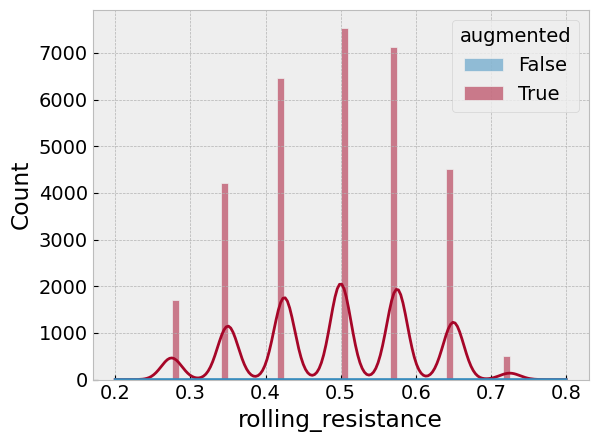

In [297]:
sns.histplot(data=new_df, x='rolling_resistance', hue="augmented", kde=True)


C:\Users\adamk\AppData\Local\Temp\ipykernel_25164\2372371390.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_plot['Angle of Repose'], hist = True, kde = True, label='augmented')
C:\Users\adamk\AppData\Local\Temp\ipykernel_25164\2372371390.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

<AxesSubplot: xlabel='Angle of Repose', ylabel='Density'>

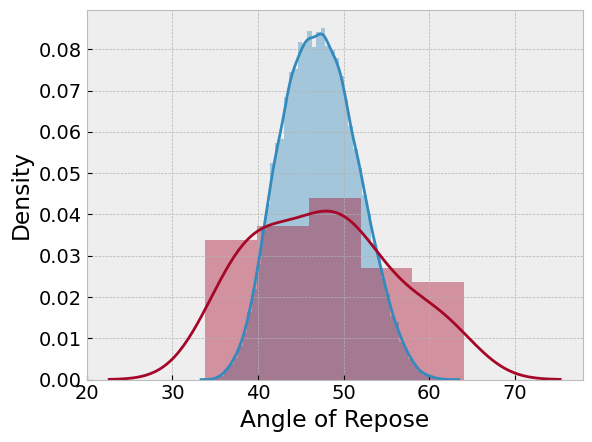

In [523]:
df_plot = new_df[new_df.augmented == True]
sns.distplot(df_plot['Angle of Repose'], hist = True, kde = True, label='augmented')
df_plot = new_df[new_df.augmented == False]
sns.distplot(df_plot['Angle of Repose'], hist = True, kde = True, label='Original', norm_hist=True)

In [299]:
new_df.columns.array[1]

'adhesive_distance'

The extra points calculated to fill in the hypergrid can be visualized in the following way. We can observe that some edge values are cut, and the Morris Method did fill the space sufficiently with trajectories.

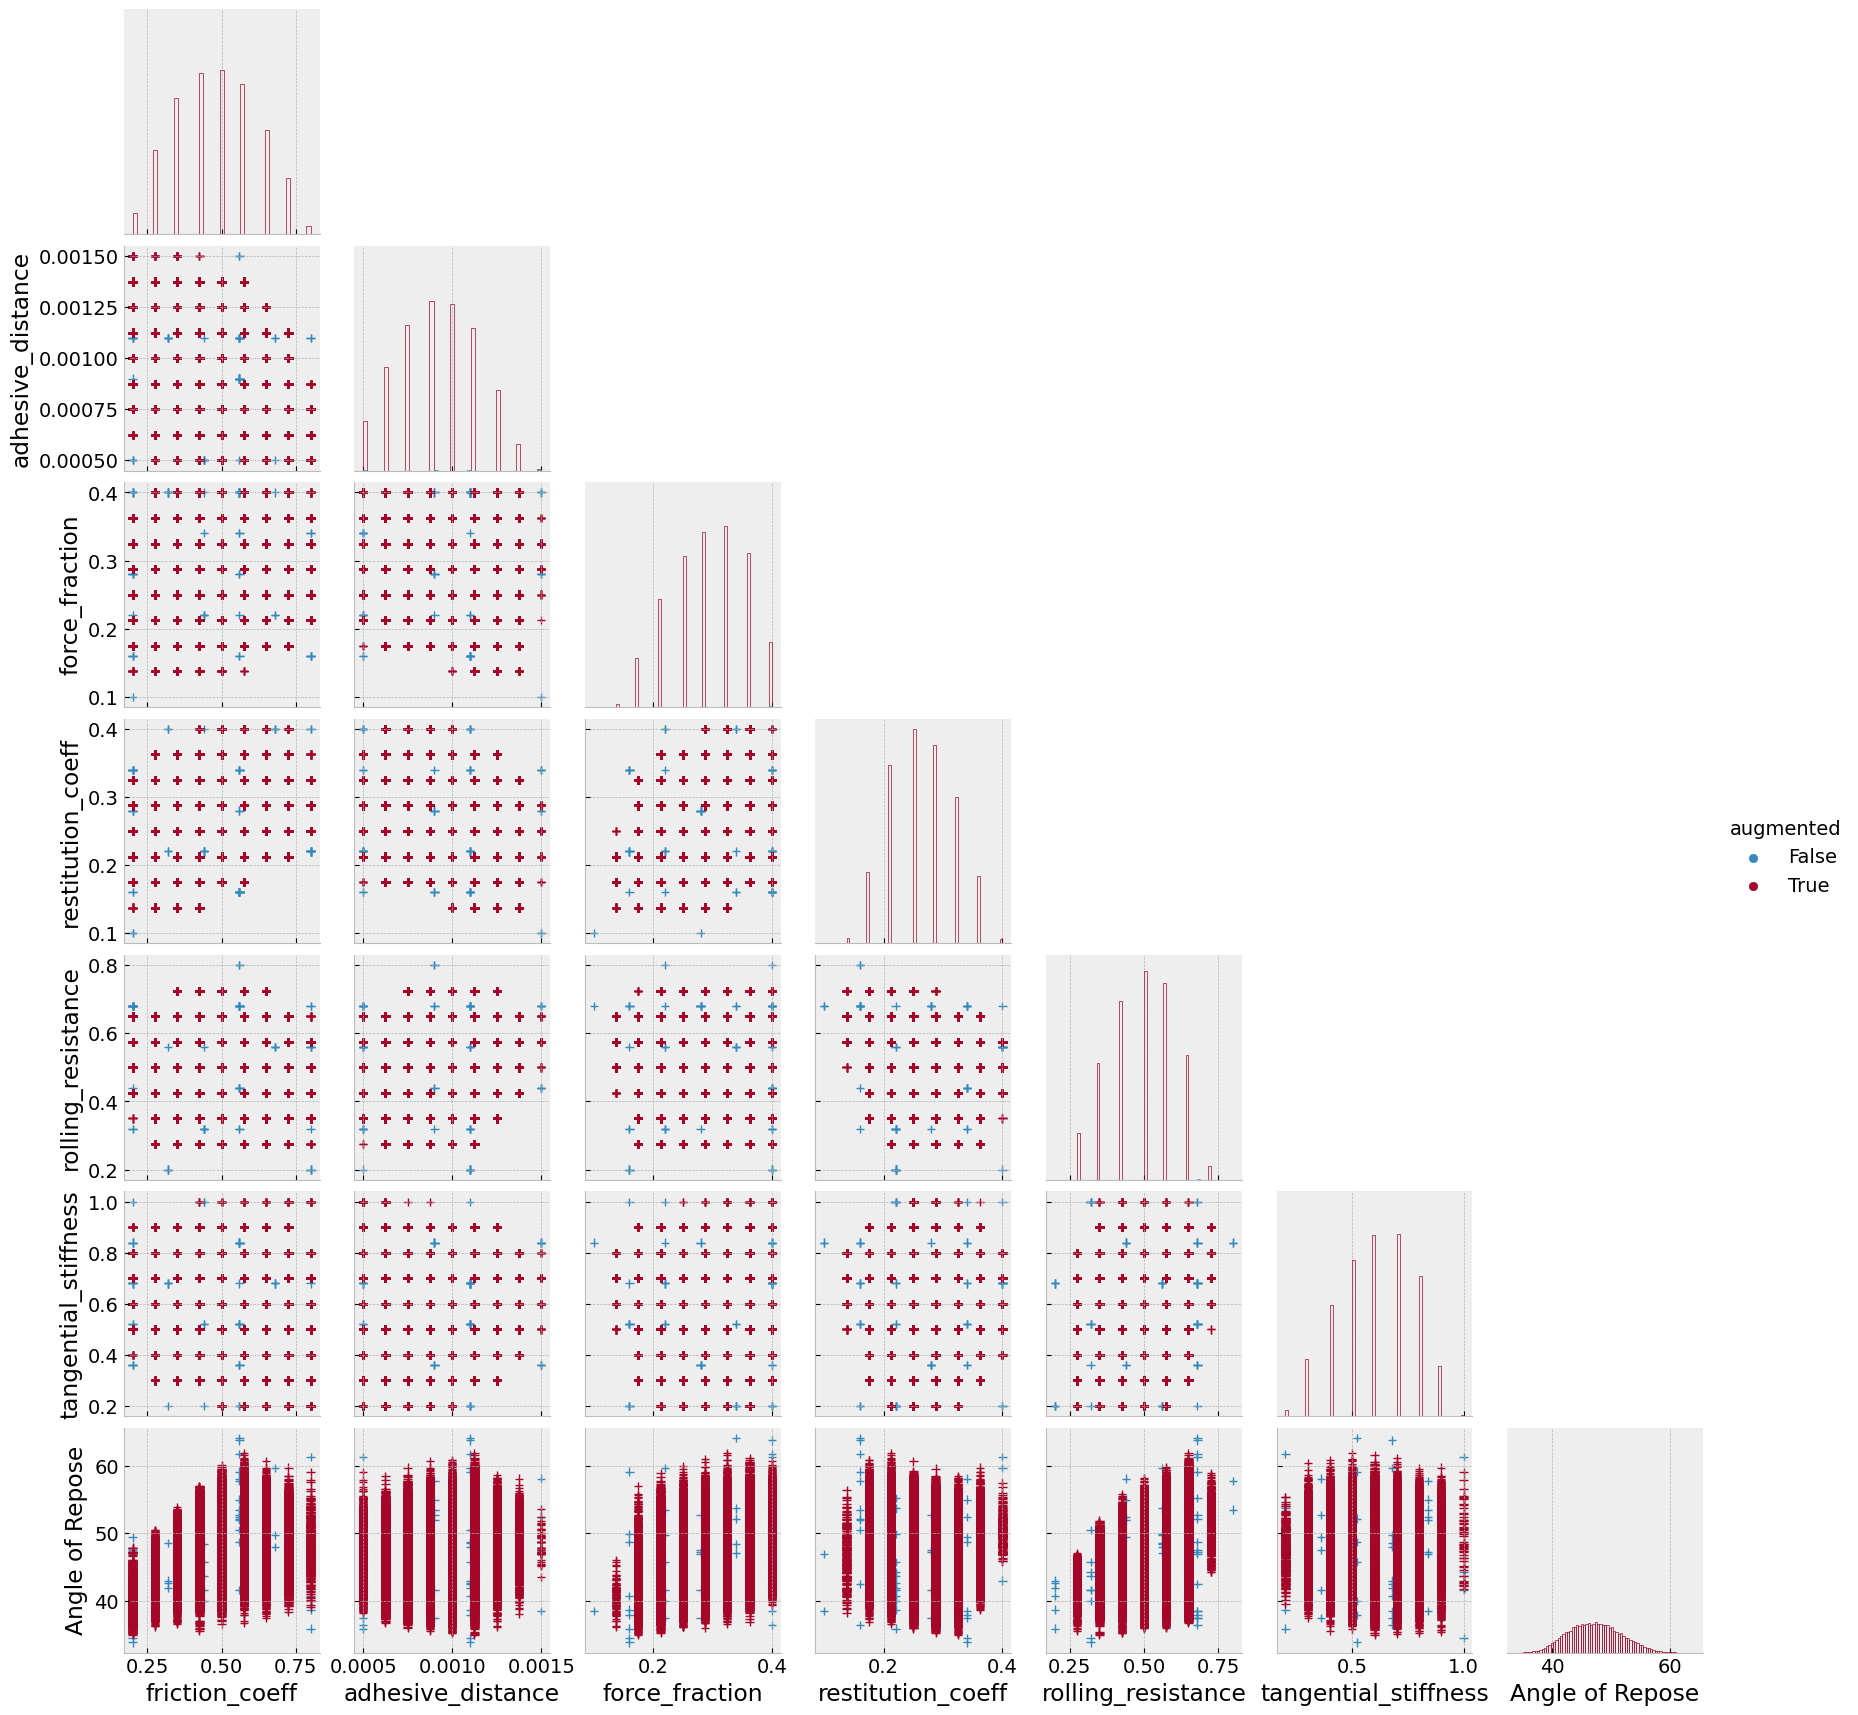

In [525]:
sns.pairplot(new_df, hue='augmented', height=2.5, plot_kws=dict(marker="+", linewidth=1), diag_kws=dict(fill=False), corner=True, diag_kind='hist')

friction_coeff


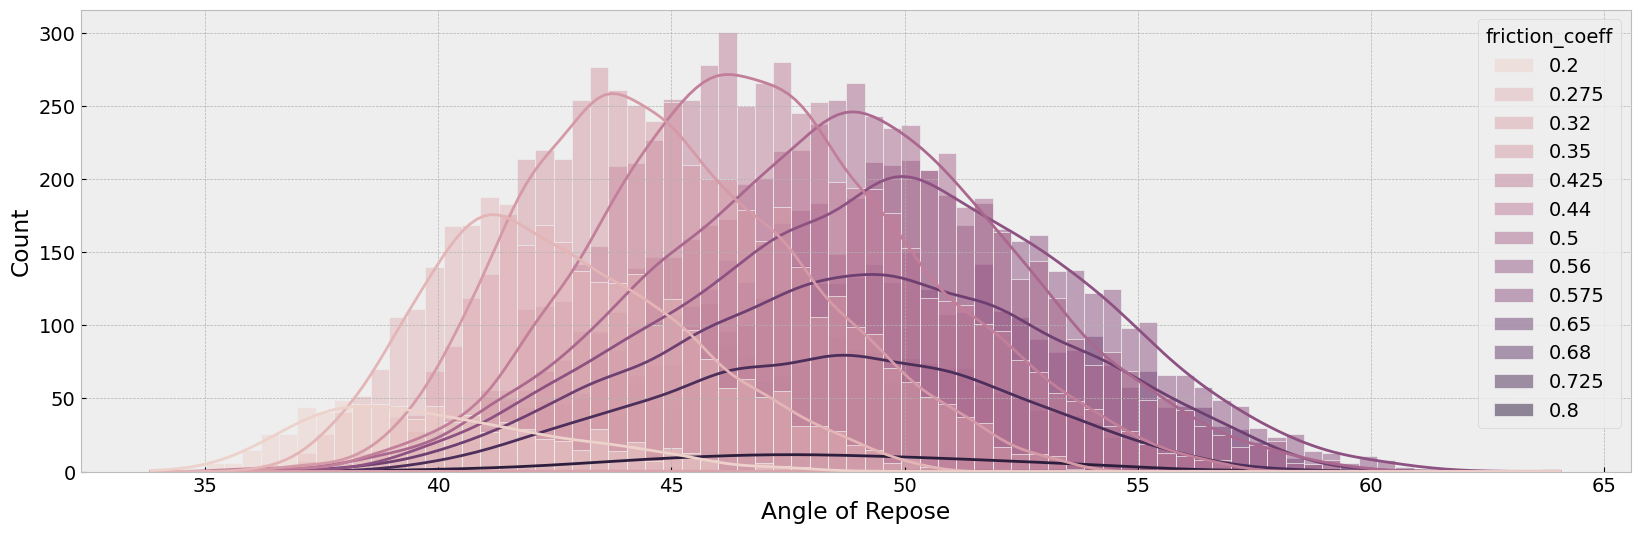

adhesive_distance


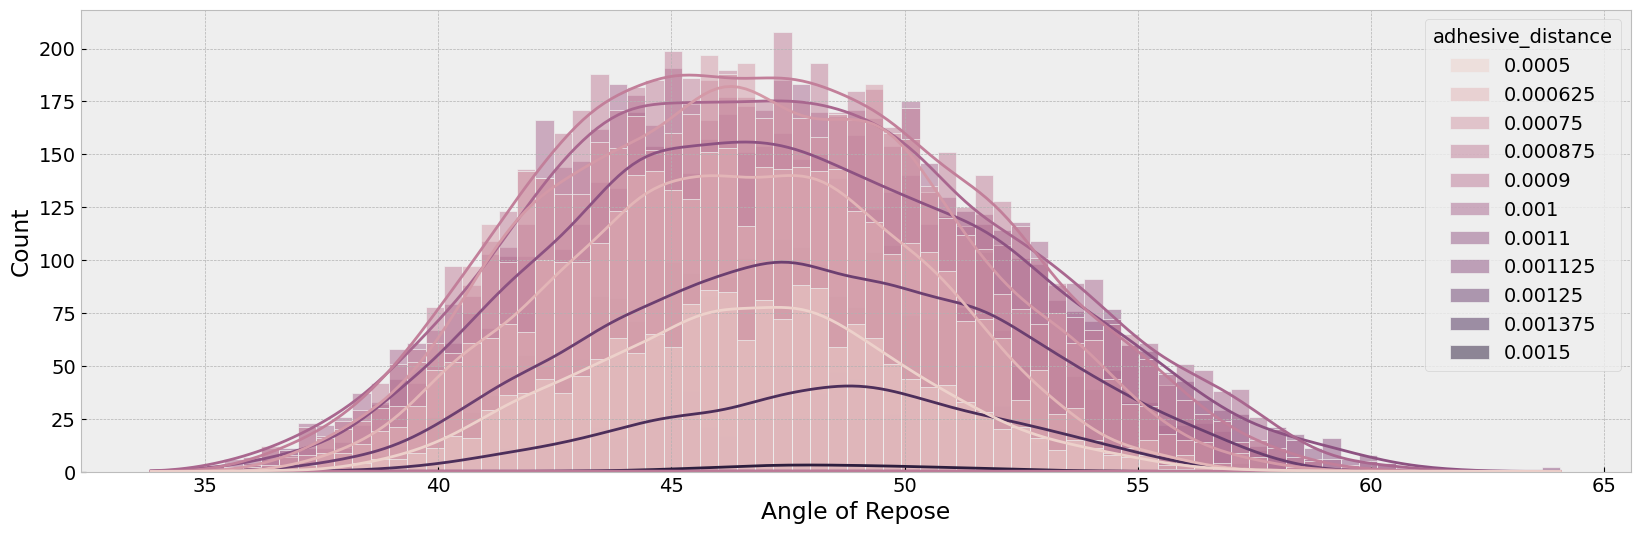

force_fraction


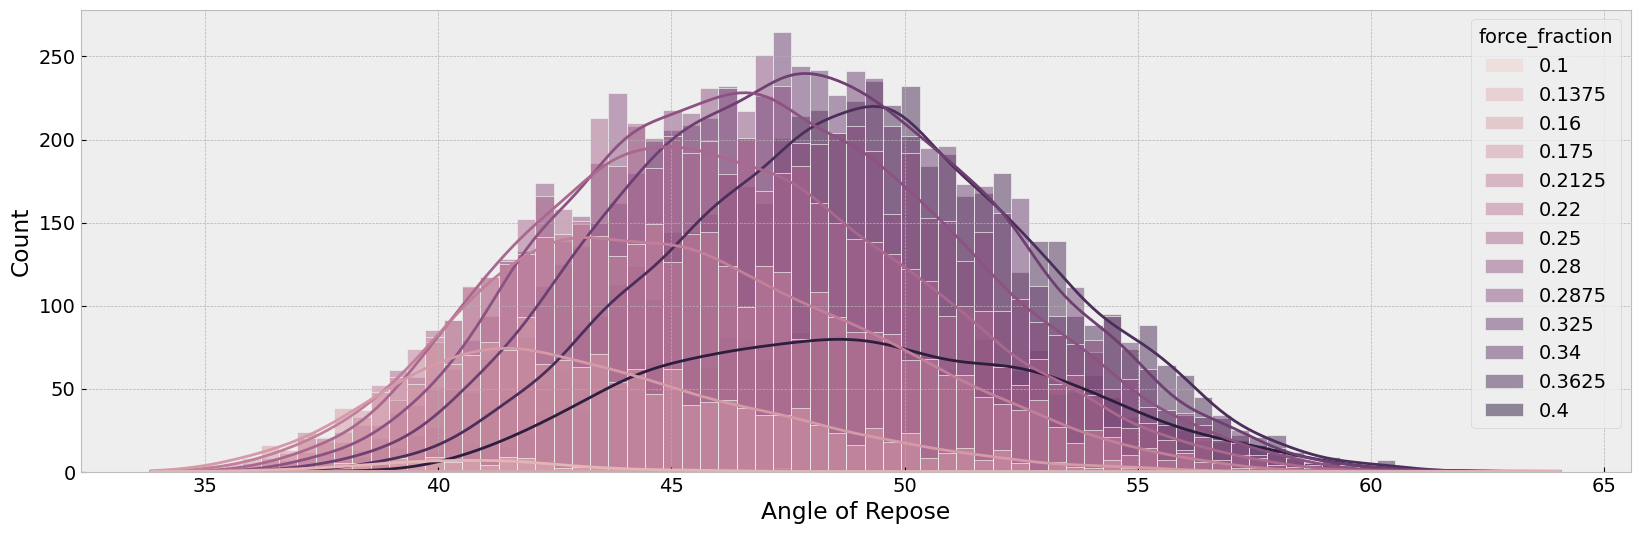

restitution_coeff


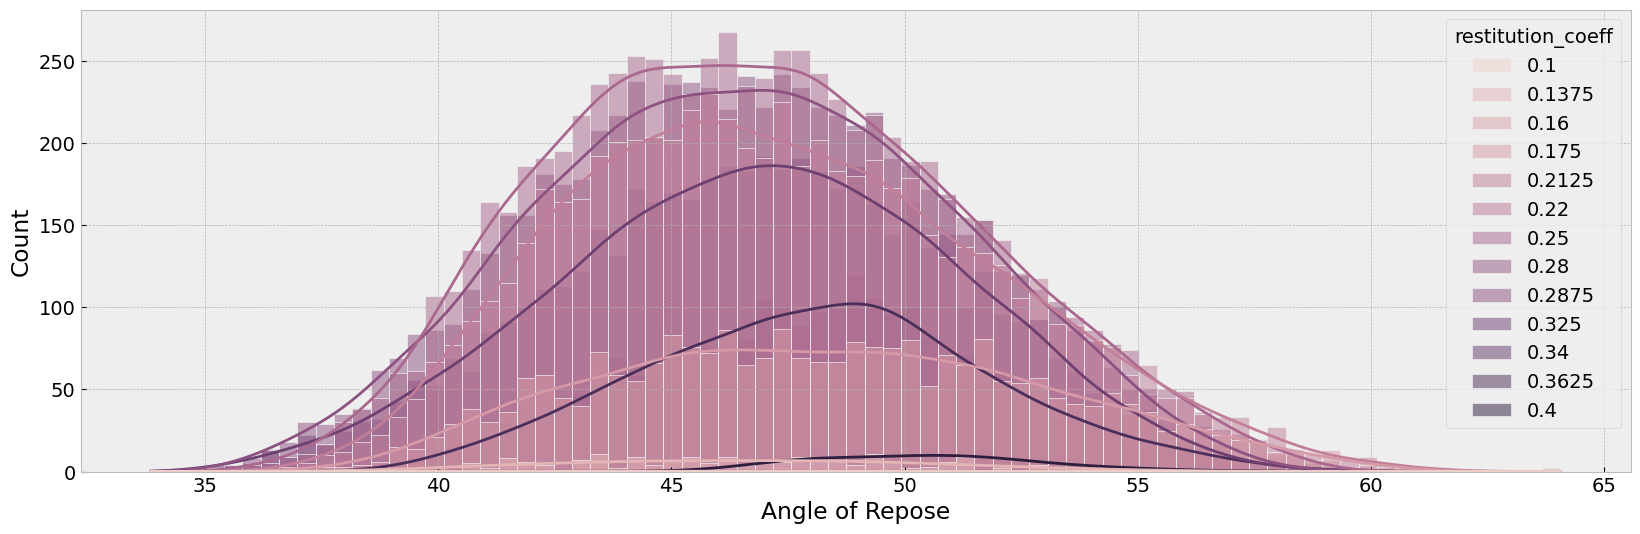

rolling_resistance


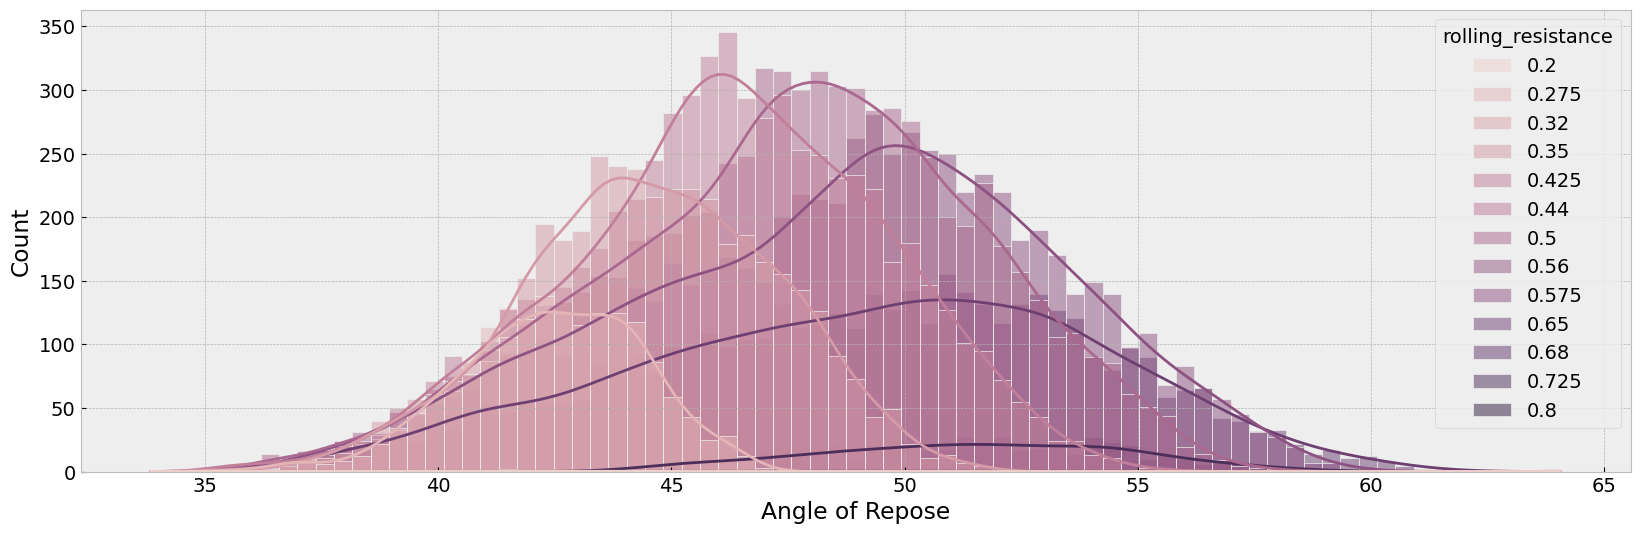

tangential_stiffness


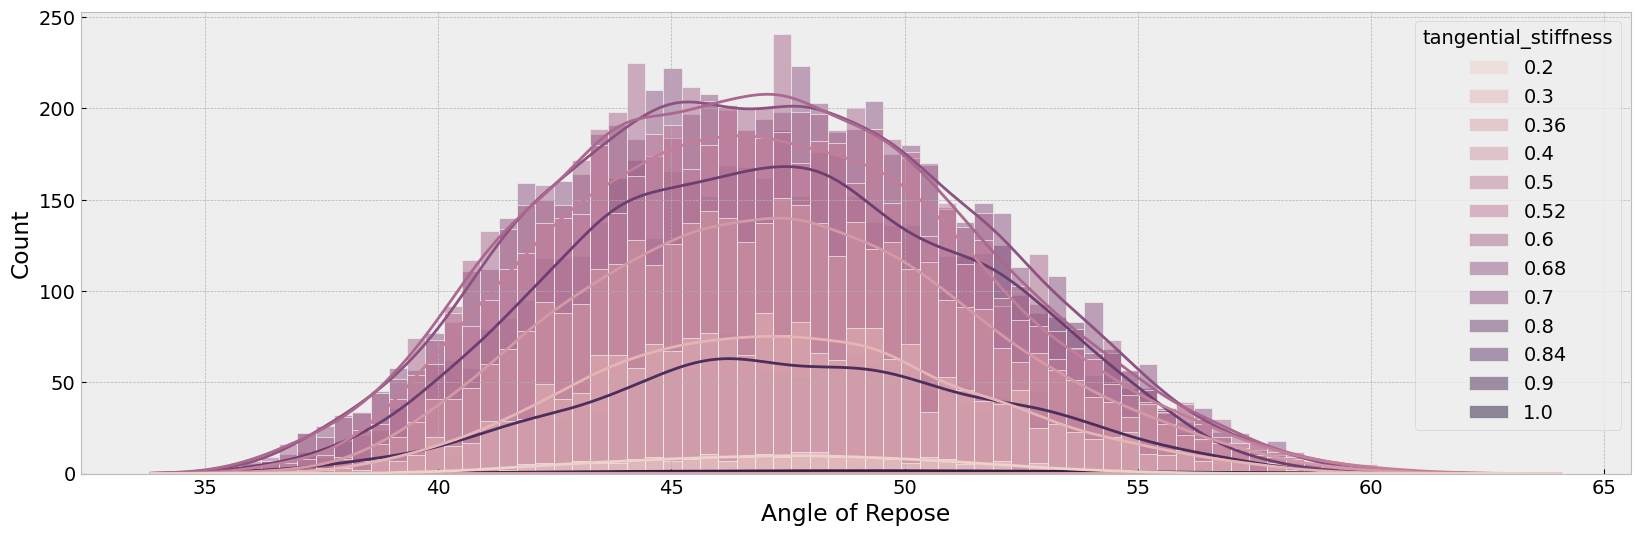

In [301]:
cropped_df = new_df.drop(['augmented'], axis = 1)
for col in cropped_df.columns.array[:-1]:
    print(col)
    plt.figure(figsize=(20,6))
    sns.histplot(data = cropped_df, x = "Angle of Repose", kde = True, hue=col)
    plt.show()


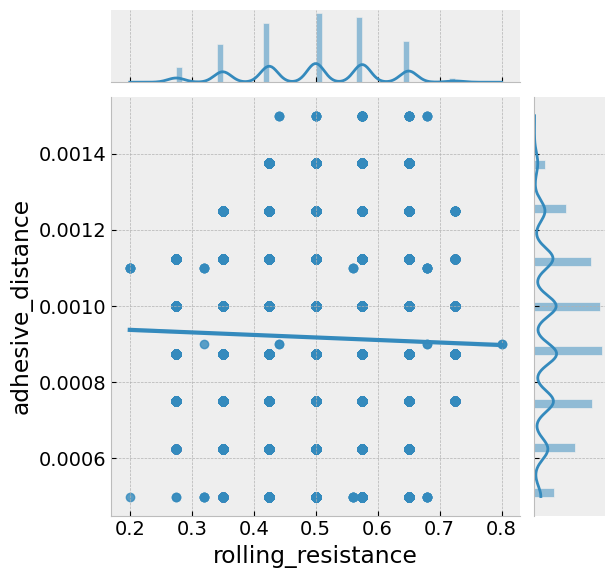

In [302]:

sns.jointplot(x="rolling_resistance", y="adhesive_distance", data=new_df, kind="reg")

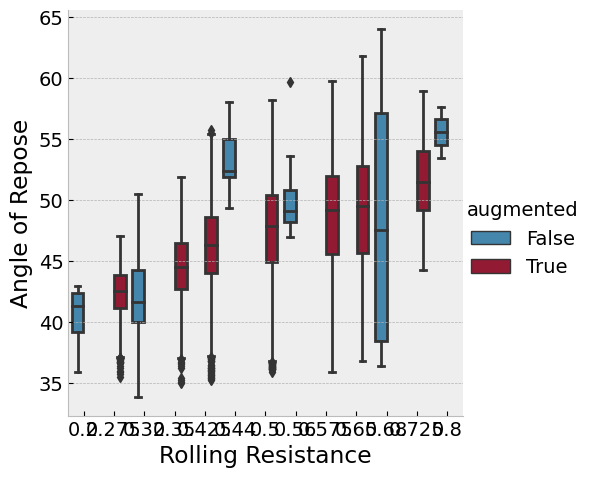

In [303]:
g = sns.catplot(x="rolling_resistance", y="Angle of Repose", hue="augmented", data=new_df, kind="box")
g.set_axis_labels("Rolling Resistance", "Angle of Repose")

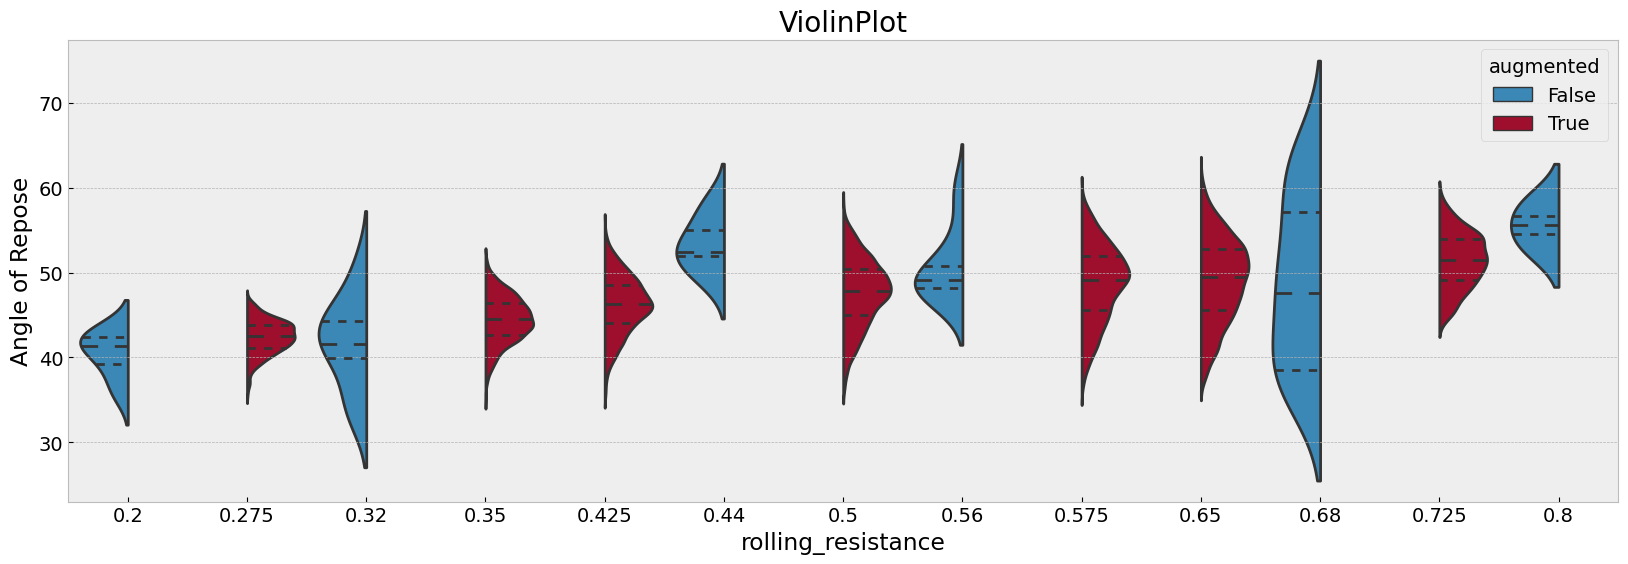

In [304]:
plt.figure(figsize=(20,6))
# plt.style.use('dark_background')
sns.violinplot(x='rolling_resistance', y='Angle of Repose', data=new_df, split=True, hue='augmented', inner='quart', saturation=0.9, dodge=False).set_title('ViolinPlot')
plt.show()

In [305]:
new_df

,friction_coeff,adhesive_distance,force_fraction,restitution_coeff,rolling_resistance,tangential_stiffness,Angle of Repose,augmented
0,0.2,0.001100,0.1600,0.34,0.32,0.52,33.840000,False
1,0.2,0.001100,0.1600,0.34,0.32,1.00,34.450000,False
2,0.8,0.000500,0.1600,0.22,0.20,0.20,35.880000,False
3,0.2,0.000500,0.4000,0.16,0.68,0.68,36.420000,False
4,0.2,0.000900,0.2800,0.28,0.68,0.36,37.400000,False
...,...,...,...,...,...,...,...,...
32099,0.8,0.000875,0.2125,0.25,0.35,0.60,45.775417,True
32100,0.8,0.000875,0.2500,0.25,0.35,0.50,44.973333,True
32101,0.8,0.000875,0.2500,0.25,0.35,0.60,45.398333,True
32102,0.8,0.000875,0.2500,0.25,0.35,0.70,45.823333,True


## 4. Modelling

In [306]:
X_aug = new_df.drop(['Angle of Repose', 'augmented'], axis = 1)
y_aug = new_df['Angle of Repose']

In [307]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import learning_curve

In [308]:
# scaler = MinMaxScaler()
# scaler.fit(X)
# X = scaler.transform(X)

In [309]:
test_splits = [0.05, 0.15, 0.2, 0.3]
random_states = [10, 42, 1234]
dataset_size = [20, 30, 40, 49]
X_train, X_test, y_train, y_test = [], [], [], []
for j in range(len(test_splits)):
    for i in range(len(random_states)):
        X_tr, X_te, y_tr, y_te = train_test_split(X_aug, y_aug, test_size=test_splits[j], random_state=random_states[i])
        X_train.append(X_tr)
        X_test.append(X_te)
        y_train.append(y_tr)
        y_test.append(y_te)
        # X_trains[i] = X_train


In [310]:
for i in range(len(test_splits)*len(random_states)):
    print(X_train[i].shape, X_test[i].shape, y_train[i].shape, y_test[i].shape)

(30498, 6) (1606, 6) (30498,) (1606,)
(30498, 6) (1606, 6) (30498,) (1606,)
(30498, 6) (1606, 6) (30498,) (1606,)
(27288, 6) (4816, 6) (27288,) (4816,)
(27288, 6) (4816, 6) (27288,) (4816,)
(27288, 6) (4816, 6) (27288,) (4816,)
(25683, 6) (6421, 6) (25683,) (6421,)
(25683, 6) (6421, 6) (25683,) (6421,)
(25683, 6) (6421, 6) (25683,) (6421,)
(22472, 6) (9632, 6) (22472,) (9632,)
(22472, 6) (9632, 6) (22472,) (9632,)
(22472, 6) (9632, 6) (22472,) (9632,)


In [311]:
print(X_train[1])

       friction_coeff  adhesive_distance  force_fraction  restitution_coeff  \
27585           0.650           0.000750          0.3250             0.2500   
14829           0.500           0.000500          0.3250             0.3625   
1655            0.275           0.000875          0.3625             0.3250   
27852           0.650           0.000750          0.3625             0.3625   
3286            0.275           0.001250          0.2875             0.1750   
...               ...                ...             ...                ...   
29802           0.725           0.000500          0.2125             0.2875   
5390            0.350           0.000875          0.3250             0.1750   
860             0.275           0.000625          0.2500             0.3250   
15795           0.500           0.000750          0.2500             0.2875   
23654           0.575           0.000875          0.3625             0.3250   

       rolling_resistance  tangential_stiffness  
2

### Import Dependencies

In [312]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [313]:
rand_state = 1234
pipelines = {
    'lr':make_pipeline(LinearRegression()),
    'rf':make_pipeline(RandomForestRegressor(random_state=rand_state)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=rand_state)),
    'ridge':make_pipeline(Ridge(random_state=rand_state)),
    'lasso':make_pipeline(Lasso(random_state=rand_state)),
    'enet':make_pipeline(ElasticNet(random_state=rand_state)),
}

In [314]:
LinearRegression().get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [315]:
hypergrid = {
    'lr':{
        'linearregression__n_jobs': [None, 10, 50, 100, 5000]
    },
    'rf':{
        'randomforestregressor__min_samples_split': [2,3,4,5,6,8,9],
        # 'randomforestregressor__min_samples_leaf': [1,2,3,4,5,6,8,9]
    },
    'gb':{
        'gradientboostingregressor__n_estimators': [100, 200, 300, 400],
        # 'gradientboostingregressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
        # 'gradientboostingregressor__max_depth': [1, 2, 3, 4, 5, 6],
        # 'gradientboostingregressor__criterion': ['friedman_mse', 'squared_error', 'mse'],
        # 'gradientboostingregressor__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.99]
    },
    'ridge':{
        'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'lasso':{
        'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'enet':{
        'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
}

In [316]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sklearn.datasets as dt

from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [317]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 20)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    # print(train_scores)
    return plt

Comparison of basic LinearRegression performance on original dataset compared to augmented one with the use of RandomForestRegressor.
It can be noted that the original set is not sufficient in size to train the model with good accuracy

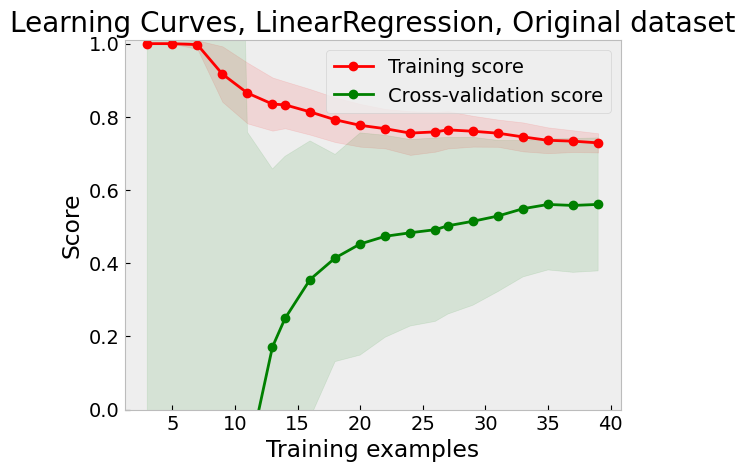

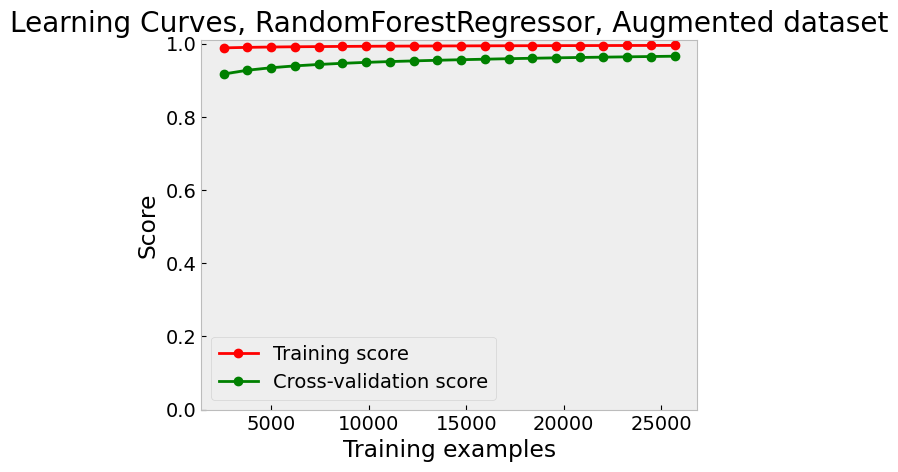

In [318]:
# cvc = ShuffleSplit(n_splits=50, test_size=0.2, random_state=42)
# title = "Learning Curves, LinearRegression, Original dataset"

# estimator = LinearRegression()
# plot_learning_curve(estimator, title, X, y, ylim=(0.0, 1.01), cv=cvc, n_jobs=-1)

# title = "Learning Curves, RandomForestRegressor, Augmented dataset"

# estimator = RandomForestRegressor()
# plot_learning_curve(estimator, title, X_aug, y_aug, ylim=(0.0, 1.01), cv=cvc, n_jobs=-1)

# plt.show()

In [319]:
np.shape(X_aug)

(32104, 6)

In [320]:
fit_models = {}
for j, random_state in enumerate(random_states):    
    for i, split_size in enumerate(test_splits):
        print(f"Current split: {split_size}")
        for algo, pipeline in pipelines.items():
            new_algo = algo + str(j) + str(i)
            model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
            try:
                print('Starting training for {}.'.format(new_algo))
                model.fit(X_train[i], y_train[i])
                fit_models[new_algo] = model
                print('{} has been successfully fit.'.format(new_algo))
            except NotFittedError as e:
                print(repr(e))

Current split: 0.05
Starting training for lr00.
lr00 has been successfully fit.
Starting training for rf00.
rf00 has been successfully fit.
Starting training for gb00.
gb00 has been successfully fit.
Starting training for ridge00.
ridge00 has been successfully fit.
Starting training for lasso00.
lasso00 has been successfully fit.
Starting training for enet00.
enet00 has been successfully fit.
Current split: 0.15
Starting training for lr01.
lr01 has been successfully fit.
Starting training for rf01.
rf01 has been successfully fit.
Starting training for gb01.
gb01 has been successfully fit.
Starting training for ridge01.
ridge01 has been successfully fit.
Starting training for lasso01.
lasso01 has been successfully fit.
Starting training for enet01.
enet01 has been successfully fit.
Current split: 0.2
Starting training for lr02.
lr02 has been successfully fit.
Starting training for rf02.
rf02 has been successfully fit.
Starting training for gb02.
gb02 has been successfully fit.
Starting 

In [321]:
print(fit_models)

{'lr00': GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'linearregression__n_jobs': [None, 10, 50, 100, 5000]}), 'rf00': GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor(random_state=1234))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__min_samples_split': [2, 3, 4,
                                                                      5, 6, 8,
                                                                      9]}), 'gb00': GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('gradientboostingregressor',
                                        GradientBoostingRegressor(random_state=1234))]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__n_estimators': [100, 200,
                 

In [322]:
fit_models['rf11'].predict(X_test[2])

array([45.14878181, 45.20484714, 45.05404773, ..., 47.12788994,
       41.16934613, 49.36821551])

In [388]:
fit_models_2 = {}
for j, random_state in enumerate(random_states):    
    for i, split_size in enumerate(test_splits):
        print(f"Current split: {split_size}")
        for algo, pipeline in pipelines.items():
            new_algo = algo + str(j) + str(i)
            # model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
            try:
                print('Starting: {}.'.format(new_algo))
                print(f"{split_size=} {random_state=}")
                # model.fit(X_train[i], y_train[i])
                # fit_models[new_algo] = model
                print('{} has been successfully fit.'.format(new_algo))
            except NotFittedError as e:
                print(repr(e))

Current split: 0.05
Starting: lr00.
split_size=0.05 random_state=10
lr00 has been successfully fit.
Starting: rf00.
split_size=0.05 random_state=10
rf00 has been successfully fit.
Starting: gb00.
split_size=0.05 random_state=10
gb00 has been successfully fit.
Starting: ridge00.
split_size=0.05 random_state=10
ridge00 has been successfully fit.
Starting: lasso00.
split_size=0.05 random_state=10
lasso00 has been successfully fit.
Starting: enet00.
split_size=0.05 random_state=10
enet00 has been successfully fit.
Current split: 0.15
Starting: lr01.
split_size=0.15 random_state=10
lr01 has been successfully fit.
Starting: rf01.
split_size=0.15 random_state=10
rf01 has been successfully fit.
Starting: gb01.
split_size=0.15 random_state=10
gb01 has been successfully fit.
Starting: ridge01.
split_size=0.15 random_state=10
ridge01 has been successfully fit.
Starting: lasso01.
split_size=0.15 random_state=10
lasso01 has been successfully fit.
Starting: enet01.
split_size=0.15 random_state=10
en

In [387]:
print(np.array(fit_models.keys()))

dict_keys(['lr00', 'rf00', 'gb00', 'ridge00', 'lasso00', 'enet00', 'lr01', 'rf01', 'gb01', 'ridge01', 'lasso01', 'enet01', 'lr02', 'rf02', 'gb02', 'ridge02', 'lasso02', 'enet02', 'lr03', 'rf03', 'gb03', 'ridge03', 'lasso03', 'enet03', 'lr10', 'rf10', 'gb10', 'ridge10', 'lasso10', 'enet10', 'lr11', 'rf11', 'gb11', 'ridge11', 'lasso11', 'enet11', 'lr12', 'rf12', 'gb12', 'ridge12', 'lasso12', 'enet12', 'lr13', 'rf13', 'gb13', 'ridge13', 'lasso13', 'enet13', 'lr20', 'rf20', 'gb20', 'ridge20', 'lasso20', 'enet20', 'lr21', 'rf21', 'gb21', 'ridge21', 'lasso21', 'enet21', 'lr22', 'rf22', 'gb22', 'ridge22', 'lasso22', 'enet22', 'lr23', 'rf23', 'gb23', 'ridge23', 'lasso23', 'enet23'])


## 5. Evaluation

In [324]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [325]:
selected_model = ""
model_scores = []
for num in range(len(test_splits)):
    for algo, model in fit_models.items():
        if str(selected_model) in algo:
            y_hat = model.predict(X_test[num])
            curr_r2 = r2_score(y_test[num], y_hat) 
            curr_MAE = mean_absolute_error(y_test[num], y_hat)
            curr_MSE = mean_squared_error(y_test[num], y_hat)
            print(f"{algo}\t{curr_r2=:.2f}\t{curr_MAE=:.2f}\t{curr_MSE=:.2f}")
            X_train.append(X_tr)
            model_scores.append([algo, curr_r2, curr_MAE, curr_MSE])

lr00	curr_r2=0.79	curr_MAE=1.60	curr_MSE=4.00
rf00	curr_r2=0.97	curr_MAE=0.56	curr_MSE=0.59
gb00	curr_r2=0.94	curr_MAE=0.84	curr_MSE=1.20
ridge00	curr_r2=0.76	curr_MAE=1.70	curr_MSE=4.75
lasso00	curr_r2=0.62	curr_MAE=2.14	curr_MSE=7.40
enet00	curr_r2=0.62	curr_MAE=2.16	curr_MSE=7.45
lr01	curr_r2=0.79	curr_MAE=1.60	curr_MSE=4.00
rf01	curr_r2=0.99	curr_MAE=0.22	curr_MSE=0.10
gb01	curr_r2=0.94	curr_MAE=0.83	curr_MSE=1.17
ridge01	curr_r2=0.76	curr_MAE=1.70	curr_MSE=4.75
lasso01	curr_r2=0.62	curr_MAE=2.14	curr_MSE=7.40
enet01	curr_r2=0.62	curr_MAE=2.16	curr_MSE=7.44
lr02	curr_r2=0.79	curr_MAE=1.60	curr_MSE=4.00
rf02	curr_r2=0.99	curr_MAE=0.23	curr_MSE=0.11
gb02	curr_r2=0.94	curr_MAE=0.83	curr_MSE=1.17
ridge02	curr_r2=0.76	curr_MAE=1.70	curr_MSE=4.74
lasso02	curr_r2=0.62	curr_MAE=2.14	curr_MSE=7.40
enet02	curr_r2=0.62	curr_MAE=2.16	curr_MSE=7.45
lr03	curr_r2=0.79	curr_MAE=1.60	curr_MSE=4.00
rf03	curr_r2=0.97	curr_MAE=0.57	curr_MSE=0.62
gb03	curr_r2=0.94	curr_MAE=0.85	curr_MSE=1.22
ridge03	cu

In [326]:
model_highest_r2 = max(model_scores, key=lambda x: x[1])
model_lowest_mae = min(model_scores, key=lambda x: x[2])
model_lowest_mse = min(model_scores, key=lambda x: x[3])
print(f'''
    {model_highest_r2[0]=} : {model_highest_r2[1]:.3f}
    {model_lowest_mae[0]=} : {model_lowest_mae[2]:.3f}
    {model_lowest_mse[0]=} : {model_lowest_mae[3]:.3f}
    ''')


    model_highest_r2[0]='rf01' : 0.995
    model_lowest_mae[0]='rf02' : 0.216
    model_lowest_mse[0]='rf00' : 0.104
    


In [327]:
best_model = fit_models['rf01']

In [328]:
np.array(best_model.predict(X_test[0]) - y_test[0])

array([-0.19976508,  0.08294503, -0.02176064, ..., -0.05571336,
       -0.00651795, -0.26585285])

In [347]:
fit_models['gb13'].predict([[0.1, 0.15, 0.16, 0.66, 0.2, 0.8]])


c:\Users\adamk\Projects\angle-of-repose-ML\.venvML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([36.66221009])

Tested on simulation with random data which resulted AoR was 37.4°.

### Test

In [435]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

In [436]:
df_new = pd.read_excel("data\DEM Simulations Data.xlsx", usecols="A:I")
df_new.head()


,Name,friction coeff,adhesive dist,force fraction,restitution coeff,rolling resistance,tangential stiffness,simulated AoR,predicted AoR
0,sim2,0.44,0.0011,0.22,0.22,0.32,0.52,42.957606,NaN
1,sim4,0.35,0.0007,0.40,0.17,0.32,0.75,43.763328,NaN
2,sim5,0.20,0.0005,0.10,0.10,0.20,0.20,28.576794,NaN
3,sim7,0.80,0.0005,0.34,0.22,0.56,0.20,46.152702,NaN
4,sim8,0.38,0.0013,0.31,0.12,0.51,0.60,51.285944,NaN


In [437]:
drop_indexes = [2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18]
df_drop = df_new.copy()
df_drop.drop(drop_indexes, axis=0, inplace=True)
df_drop.head()
X_new = df_new.to_numpy()
X_drop = df_drop.to_numpy()


In [438]:
df.head()


,friction_coeff,adhesive_distance,force_fraction,restitution_coeff,rolling_resistance,tangential_stiffness,Angle of Repose,augmented
0,0.2,0.0011,0.16,0.34,0.32,0.52,33.84,False
1,0.2,0.0011,0.16,0.34,0.32,1.00,34.45,False
2,0.8,0.0005,0.16,0.22,0.20,0.20,35.88,False
3,0.2,0.0005,0.40,0.16,0.68,0.68,36.42,False
4,0.2,0.0009,0.28,0.28,0.68,0.36,37.40,False


In [439]:
df_new.head()


,Name,friction coeff,adhesive dist,force fraction,restitution coeff,rolling resistance,tangential stiffness,simulated AoR,predicted AoR
0,sim2,0.44,0.0011,0.22,0.22,0.32,0.52,42.957606,NaN
1,sim4,0.35,0.0007,0.40,0.17,0.32,0.75,43.763328,NaN
2,sim5,0.20,0.0005,0.10,0.10,0.20,0.20,28.576794,NaN
3,sim7,0.80,0.0005,0.34,0.22,0.56,0.20,46.152702,NaN
4,sim8,0.38,0.0013,0.31,0.12,0.51,0.60,51.285944,NaN


In [440]:
df_drop.head()

,Name,friction coeff,adhesive dist,force fraction,restitution coeff,rolling resistance,tangential stiffness,simulated AoR,predicted AoR
0,sim2,0.440000,0.001100,0.220000,0.220000,0.320000,0.520000,42.957606,NaN
1,sim4,0.350000,0.000700,0.400000,0.170000,0.320000,0.750000,43.763328,NaN
5,sim9,0.500000,0.001000,0.200000,0.200000,0.400000,0.700000,48.167879,NaN
6,sim10,0.300000,0.001200,0.320000,0.290000,0.300000,0.400000,46.872942,NaN
16,sim21,0.260416,0.001039,0.315308,0.367341,0.550838,0.218895,43.175327,NaN


In [446]:
loaded_model = fit_models['rf02']

In [447]:
errors = []
errors_drop = []
predicted_aor = []
predicted_aor_drop = []
for i in X_new:
    result = loaded_model.predict(i[1:7].reshape(6,-1).T)
    # print(result)
    diff = i[7]-result
    errors.append(float(diff))
    # print(f"{diff=}")
    predicted_aor.append(float(result))
 
for i in X_drop:
    result = loaded_model.predict(i[1:7].reshape(6,-1).T)
    # print(i)
    # print(result)
    diff = i[7]-result
    errors_drop.append(float(diff))
    # print(f"{diff=}")
    predicted_aor_drop.append(float(result))   

print(predicted_aor)
print(predicted_aor_drop)
df_new['predicted AoR'] = predicted_aor
df_new['error'] = errors
df_drop['predicted AoR'] = predicted_aor_drop
df_drop['error'] = errors_drop


[44.15221337999995, 41.96495619000001, 34.45037782000002, 53.080839749999974, 47.65173856999999, 47.833513950000054, 43.71830948999998, 40.48823043000001, 40.631138329999985, 38.616812370000076, 48.60952948000001, 46.18534638000006, 41.91642087999993, 48.393356219999944, 46.12336537999997, 48.20137843999991, 44.06797992999999, 40.491356990000014, 40.513166280000036, 41.90225137999995, 39.87382664000005]
[44.15221337999995, 41.96495619000001, 47.833513950000054, 43.71830948999998, 44.06797992999999, 40.491356990000014, 41.90225137999995, 39.87382664000005]


c:\Users\adamk\Projects\angle-of-repose-ML\.venvML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\adamk\Projects\angle-of-repose-ML\.venvML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\adamk\Projects\angle-of-repose-ML\.venvML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\adamk\Projects\angle-of-repose-ML\.venvML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\adamk\Projects\angle-of-repose-ML\.venvML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Rand

In [448]:
y_test_new = np.array(df_new['simulated AoR'])
y_hat_new = np.array(predicted_aor)
y_test_dropped = np.array(df_drop['simulated AoR'])
y_hat_dropped = np.array(predicted_aor_drop)
print(y_test_new.shape)
print(y_hat_new.shape)
print(y_test_dropped.shape)
print(y_hat_dropped.shape)


(21,)
(21,)
(8,)
(8,)


In [449]:
pred_r2_drop = r2_score(y_test_dropped, y_hat_dropped) 
pred_MAE_drop = mean_absolute_error(y_test_dropped, y_hat_dropped)
pred_MSE_drop = mean_squared_error(y_test_dropped, y_hat_dropped)

pred_r2 = r2_score(y_test_new, y_hat_new) 
pred_MAE = mean_absolute_error(y_test_new, y_hat_new) 
pred_MSE = mean_squared_error(y_test_new, y_hat_new) 
print(f"Errors without parameters close to boundaries:\n\t{pred_r2_drop=:.2f}\t{pred_MAE_drop=:.2f}\t{pred_MSE_drop=:.2f}")

print(f"Errors with all simulations:\n\t{pred_r2=:.2f}\t\t{pred_MAE=:.2f}\t\t{pred_MSE=:.2f}")
# es.append([algo, curr_r2, curr_MAE, curr_MSE])
print(f"{errors=}")
print(f"{errors_drop=}")

Errors without parameters close to boundaries:
	pred_r2_drop=0.68	pred_MAE_drop=1.26	pred_MSE_drop=2.42
Errors with all simulations:
	pred_r2=0.72		pred_MAE=2.23		pred_MSE=8.33
errors=[-1.1946071135882477, 1.798372287260392, -5.873584255377121, -6.928137745061072, 3.6342056818568054, 0.334364759282046, 3.154632326399117, -0.5205526198110064, 0.5355245388084171, -0.3985811054792734, 2.676414771856784, 1.6097683001620382, -2.852881137807735, 3.716368322903456, 4.194794057928931, -0.6566429467094039, -0.8926529232854961, 0.040734093782688774, 3.0701824225624677, -1.6905015323786543, 0.9765794668658501]
errors_drop=[-1.1946071135882477, 1.798372287260392, 0.334364759282046, 3.154632326399117, -0.8926529232854961, 0.040734093782688774, -1.6905015323786543, 0.9765794668658501]


### Deployment
The deployed model can be tested on basic webpage hosted via Azure with limited possibilities.\
link: https://aor-predictor.azurewebsites.net/

In [450]:
# import pickle
# pickle.dump(best_model, open('rf_regressor.pkl', 'wb'))